# Minicurso Python - SEMMAP 6

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

PyTorch é uma biblioteca de tensores, que sao semanhantes a Numpy Arrays. A diferença é que os Tensores podem ser computados em GPUs

## Tensores

Inicializar uma matriz 5x3 com lixo de memoria

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[       nan, 4.5909e-41, 6.9819e-37],
        [0.0000e+00, 1.3209e+28, 4.5909e-41],
        [1.3228e+28, 4.5909e-41, 1.3225e+28],
        [4.5909e-41, 2.4433e+28, 4.5909e-41],
        [2.4433e+28, 4.5909e-41, 1.3228e+28]])


Inicializar uma matriz 5x3 aleatória

In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0464, 0.8904, 0.2241],
        [0.6461, 0.4782, 0.9987],
        [0.1327, 0.7324, 0.1146],
        [0.6568, 0.5342, 0.1779],
        [0.0842, 0.6604, 0.1706]])


Ou com zeros

In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


E com alguma informaçao qualquer

In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
x.size()

torch.Size([2])

In [7]:
y = torch.rand(4, 4)
x = torch.rand(4, 4)

print(torch.add(x, y))


tensor([[1.1904, 0.7373, 1.1180, 1.1525],
        [0.8443, 0.9064, 1.2267, 0.8234],
        [0.9549, 1.1839, 0.4988, 0.8636],
        [1.3307, 1.2280, 0.3561, 0.9560]])


In [8]:
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
z

tensor([[0.4200, 0.4811, 0.8102, 0.8799, 0.6818, 0.4589, 0.8878, 0.7396],
        [0.4690, 0.5705, 0.4451, 0.2654, 0.7478, 0.6780, 0.0943, 0.6298]])

In [9]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-2.3291])
-2.3291051387786865


In [10]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## AUTOGRAD: Derivadas

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

Um tensor tem o atributo ".requires_grad". Se ele for True, o programa rastreia toda operaçao feita com ele para caucular o gradiente desse Tensor.

Quando acabamos as contas é só usar o ".backward()" para calcular os gradientes

Esse gradiente fica acumulado em ".grad"

Para para de calcular o gradiente é só usar o ".detach()"

In [11]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [12]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [13]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [14]:
out.backward()

In [15]:
# d(out)/dx
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [16]:
x = torch.tensor([3.0, 3.0], requires_grad=True) # X = (x1, x2)
print(x)
z = torch.dot(x, x) # f(x1, x2) = x1^2 + x2^2;
print(z)
z.backward()
print(x.grad) # grad(f) = (2*x1, 2*x2)

tensor([3., 3.], requires_grad=True)
tensor(18., grad_fn=<DotBackward>)
tensor([6., 6.])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


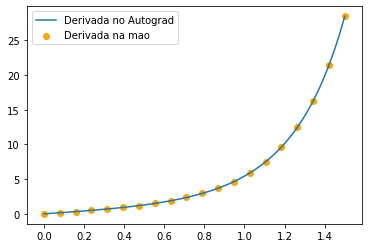

In [17]:
grads = []

for t in torch.linspace(0,1.5,100):
    x = torch.tensor(t, requires_grad=True) # X = (x1)
    z = torch.exp(x*x)
    z.backward()
    grads.append(x.grad.item())
    x.grad.data.zero_()
    
np_x = np.linspace(0,1.5, 20)
plt.scatter(np_x, np.exp(np_x**2)*np_x*2, color="orange", label = "Derivada na mao")
plt.plot(torch.linspace(0,1.5,100).numpy(), grads, label="Derivada no Autograd")
plt.legend()
plt.show()


## Redes Neurais


Procedimento típico:

1. Definir uma arquitetura como algum parametros para a rede aprender
2. Iterar sobre um conjunto de dados
3. Passar esses dados pela nossa rede
4. Computar a funçao de perda (loss)
5. Propagar os gradientes
6. Atualizar os parametros
    - `weight = weight - learning_rate * gradient`

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


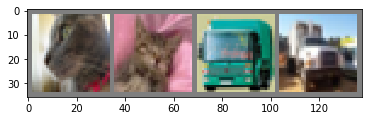

  cat   cat truck truck


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.229
[1,  4000] loss: 1.932
[1,  6000] loss: 1.767
[1,  8000] loss: 1.657
[1, 10000] loss: 1.591
[1, 12000] loss: 1.555
[2,  2000] loss: 1.492
[2,  4000] loss: 1.437


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))